<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Domain_Analytics_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Libraries and Dataset

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, binom, geom

from scipy.stats import ttest_1samp, ttest_ind,ttest_rel

from scipy.stats import chisquare,chi2,chi2_contingency

from scipy.stats import f_oneway,kruskal,shapiro,levene
from statsmodels.graphics.gofplots import qqplot

from scipy.stats import pearsonr,spearmanr

In [2]:
!gdown 1E-llv0qvRujhRIng_A46-yHTJErHBb2R

Downloading...
From: https://drive.google.com/uc?id=1E-llv0qvRujhRIng_A46-yHTJErHBb2R
To: /content/campaign - campaign.csv
100% 220k/220k [00:00<00:00, 6.00MB/s]


Campaign Dataset Column Details:
*	ID: Customer's Unique Identifier
*	Year_Birth: Customer's Birth Year
*	Education: Customer's education level (Graduation, Master, PhD, 2n Cycle(Diploma), Basic)
*	Marital_Status: Customer's marital status
*	Income: Customer's yearly household income
*	Kidhome: Number of children in customer's household
*	Teenhome: Number of teenagers in customer's household
*	Dt_Customer: Date of customer's enrollment with the company
*	Recency: Number of days since customer's last purchase
*	MntWines: Amount spent on wine in the last 2 years
*	MntFruits: Amount spent on fruits in the last 2 years
*	MntMeatProducts: Amount spent on meat in the last 2 years
*	MntFishProducts: Amount spent on fish in the last 2 years
*	MntSweetProducts: Amount spent on sweets in the last 2 years
*	MntGoldProds: Amount spent on gold in the last 2 years
*	NumDealsPurchases: Number of purchases made with a discount
*	NumWebPurchases: Number of purchases made through the company's web site
*	NumCatalogPurchases: Number of purchases made using a catalogue
*	NumStorePurchases: Number of purchases made directly in stores
*	NumWebVisitsMonth: Number of visits to company's web site in the last month
*	AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise (Target variable)
*	AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise (Target variable)
*	AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise (Target variable)
*	AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise (Target variable)
*	AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise (Target variable)
*	Complain: 1 if customer complained in the last 2 years, 0 otherwise
*	Country: Customer's location


In [44]:
campaign = pd.read_csv("campaign - campaign.csv")

In [4]:
campaign.shape

(2239, 27)

In [ ]:
campaign.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,4,6,1,0,0,0,0,0,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,3,7,5,0,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,2,5,2,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,0,2,7,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,1,2,7,1,0,0,0,0,0,SP


In [ ]:
for x in campaign.columns:
  #print("Values count of feature ",x)
  print(campaign[x].value_counts())
  print("***********************************")

* lets do  cleaning columns as per the Analysis Requirement

## Cleaning & Data Preparation

### Income

In [45]:
campaign["Income"] = campaign["Income"].str.replace("$","")
campaign["Income"] = campaign["Income"].str.replace(",","")
campaign["Income"] = campaign["Income"].astype(float)

<Axes: xlabel='Income', ylabel='Count'>

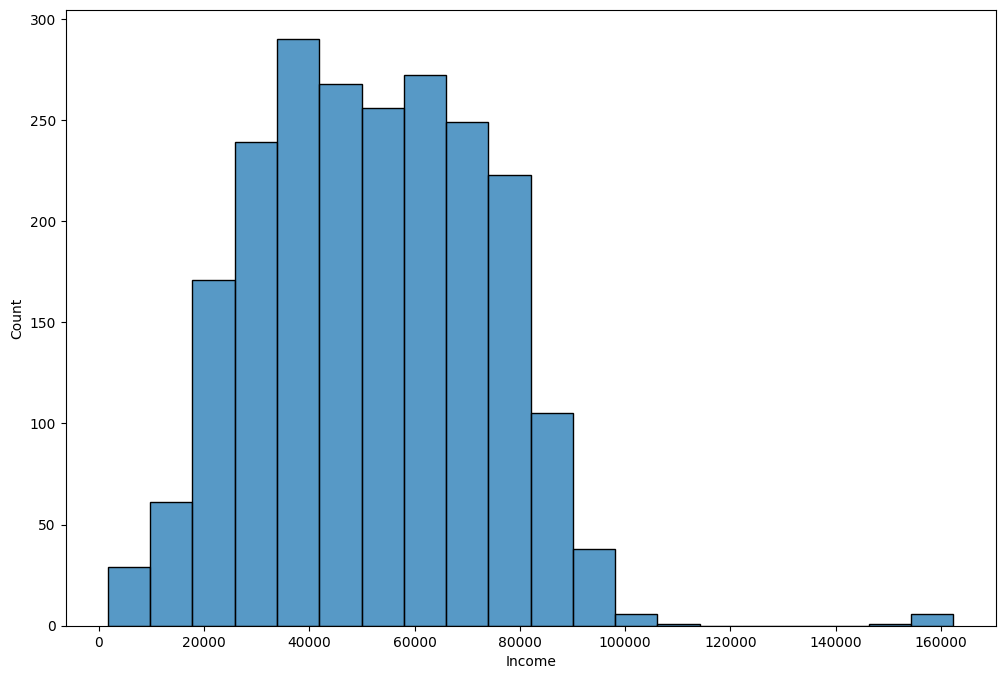

In [10]:
plt.figure(figsize=(12,8))
sns.histplot(campaign["Income"], bins=20)

In [49]:
campaign[["Income"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Income  2215 non-null   float64
dtypes: float64(1)
memory usage: 17.6 KB


In [52]:
campaign["Income"].isna().sum(axis=0)

24

In [55]:
campaign["Income"] = campaign["Income"].fillna(campaign["Income"].median())

### Marital_Status

In [56]:
campaign["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    579
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

In [57]:
campaign["Marital_Status"] = campaign["Marital_Status"].replace({"Married":"Couple",
                                                                   "Together":"Couple",
                                                                   "Divorced": "Single",
                                                                   "Widow": "Single",
                                                                   "Alone" : "Single",
                                                                   "YOLO" : "Single",
                                                                   "Absurd": "Single"})

In [58]:
campaign["Marital_Status"].value_counts()

Marital_Status
Couple    1443
Single     796
Name: count, dtype: int64

## Feature Engineering

### Children = Kidhome + Teenhome

In [59]:
campaign["Children"] = campaign["Kidhome"]+campaign["Teenhome"]

### Age

In [60]:
campaign.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country,Children
0,1826,1970,Graduation,Single,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,0,SP,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,0,CA,0
2,10476,1958,Graduation,Couple,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,US,1
3,1386,1967,Graduation,Couple,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,AUS,2
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,0,SP,1


In [61]:
campaign["Age"] = 2024 - campaign["Year_Birth"]

In [62]:
campaign["Age"].describe()

count    2239.000000
mean       55.197856
std        11.985494
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: Age, dtype: float64

In [63]:
campaign["Year_Birth"].describe()

count    2239.000000
mean     1968.802144
std        11.985494
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

### Campaign accepted

In [64]:
campaign["cmpaccepted"] = (campaign[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"]] == 1).any(axis=1)

In [65]:
campaign["cmpaccepted"].value_counts()

cmpaccepted
False    1776
True      463
Name: count, dtype: int64

### Incomegroup

In [66]:
campaign["Income"].describe()

count      2239.000000
mean      51963.463600
std       21410.674611
min        1730.000000
25%       35533.500000
50%       51373.000000
75%       68277.500000
max      162397.000000
Name: Income, dtype: float64

In [67]:
campaign["Incomegroup"] = "lowerincome"

In [68]:
campaign["Income"].median()

51373.0

In [69]:
campaign.loc[campaign["Income"] > campaign["Income"].median(),"Incomegroup"] = "upperincome"

In [70]:
campaign["Incomegroup"].value_counts()

Incomegroup
lowerincome    1132
upperincome    1107
Name: count, dtype: int64

### Totalamount Spent

In [77]:
campaign["TotalSpent"] = campaign['MntWines'] + campaign['MntFruits'] + campaign['MntMeatProducts'] + campaign['MntFishProducts'] + campaign['MntSweetProducts'] +campaign['MntGoldProds']

<Axes: xlabel='TotalSpent', ylabel='Count'>

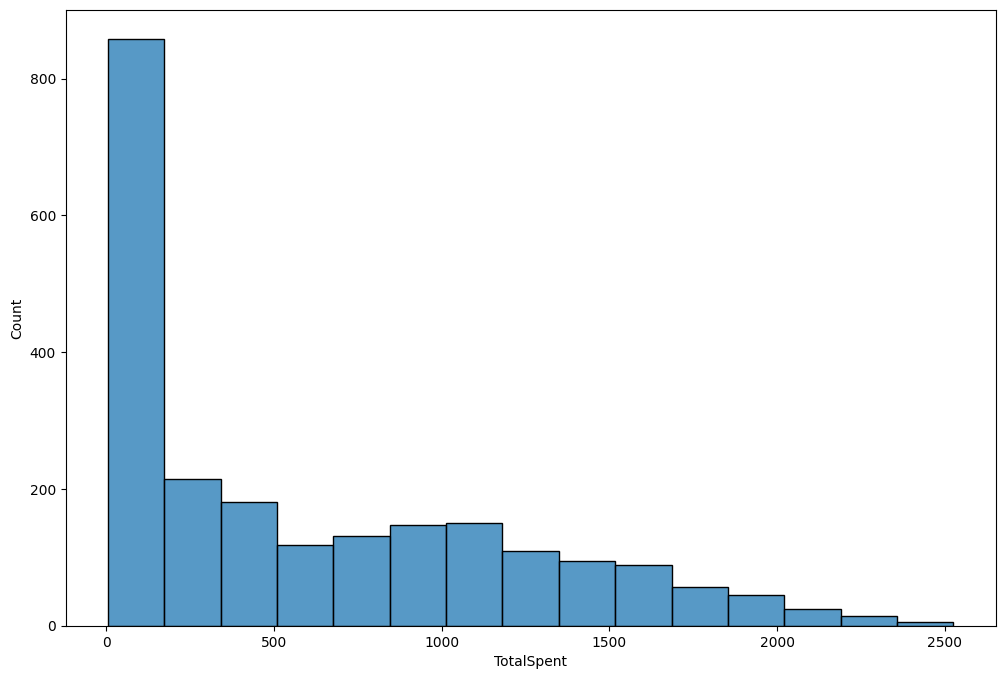

In [78]:
plt.figure(figsize=(12,8))
sns.histplot(campaign["TotalSpent"] , bins = 15)

In [79]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2239 non-null   int64  
 1   Year_Birth           2239 non-null   int64  
 2   Education            2239 non-null   object 
 3   Marital_Status       2239 non-null   object 
 4   Income               2239 non-null   float64
 5   Kidhome              2239 non-null   int64  
 6   Teenhome             2239 non-null   int64  
 7   Dt_Customer          2239 non-null   object 
 8   Recency              2239 non-null   int64  
 9   MntWines             2239 non-null   int64  
 10  MntFruits            2239 non-null   int64  
 11  MntMeatProducts      2239 non-null   int64  
 12  MntFishProducts      2239 non-null   int64  
 13  MntSweetProducts     2239 non-null   int64  
 14  MntGoldProds         2239 non-null   int64  
 15  NumDealsPurchases    2239 non-null   i

## Hypothesis Testing

### Is income of customers dependent on their education

In [81]:
campaign["Education"].value_counts()

Education
Graduation    1126
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='Income'>

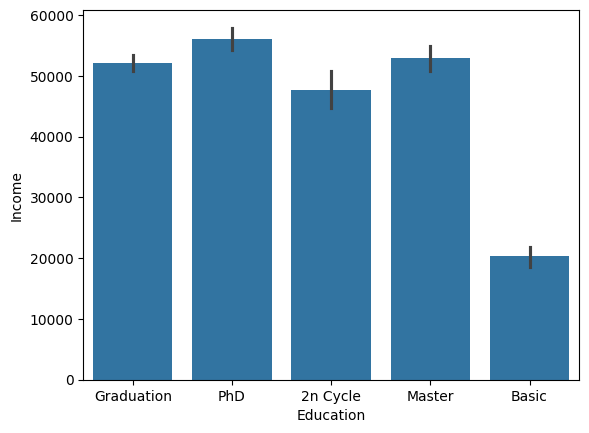

In [88]:
sns.barplot(data = campaign, x="Education", y ="Income", estimator = np.mean)

* As there are more than 2 Categories, we will do ANNOVA or Kruskal Wallis

In [82]:
Education1 = campaign[campaign["Education"]=="Graduation"]["Income"]
Education2 = campaign[campaign["Education"]=="PhD"]["Income"]
Education3 = campaign[campaign["Education"]=="Master"]["Income"]
Education4 = campaign[campaign["Education"]=="2n Cycle"]["Income"]
Education5 = campaign[campaign["Education"]=="Basic"]["Income"]

let's check for Normal Distribution of all data sets using shapiro test

In [85]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in [Education1,Education2,Education3,Education4,Education5]:
  test_stat, p_value = shapiro(i)
  if p_value < 0.05:
       print("Reject H0")
       print("Data is Not Gaussian")
  else:
       print("Fail to reject H0")
       print("Data is Gaussian")

Reject H0
Data is Not Gaussian
Reject H0
Data is Not Gaussian
Reject H0
Data is Not Gaussian
Reject H0
Data is Not Gaussian
Fail to reject H0
Data is Gaussian


* Only one Data is Gaussian,Lets check Equal Variances using Levene Test

In [86]:
# Ho: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(Education1,Education2,Education3,Education4,Education5)
print(p_value)
if p_value < 0.05:
    print("Reject Ho")
    print("Variances are not equal")
else:
    print("Fail to reject Ho")
    print("Variances are equal")

1.9647881822505775e-14
Reject Ho
Variances are not equal


* All four weather Datasets do not have equal Variance
* ANNOVA assumption fails, we will do kruskal Wallis test

In [87]:
#H0 : All groups have same mean
#Ha : One or more groups have different mean

kruskal_stat, p_value= kruskal(Education1,Education2,Education3,Education4,Education5)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

7.851335079234417e-30
Reject H0
One or more groups have different mean


**We can Say that Customer Income is definetley Vary with respect to Education**

### Do higher income people spend more (take in account spending in all categories together)

In [92]:
campaign[["Income", "TotalSpent"]].describe()

,Income,TotalSpent
count,2239.000000,2239.000000
mean,51963.463600,606.041090
std,21410.674611,602.274089
min,1730.000000,5.000000
25%,35533.500000,69.000000
50%,51373.000000,396.000000
75%,68277.500000,1046.000000
max,162397.000000,2525.000000


<Axes: xlabel='Income', ylabel='TotalSpent'>

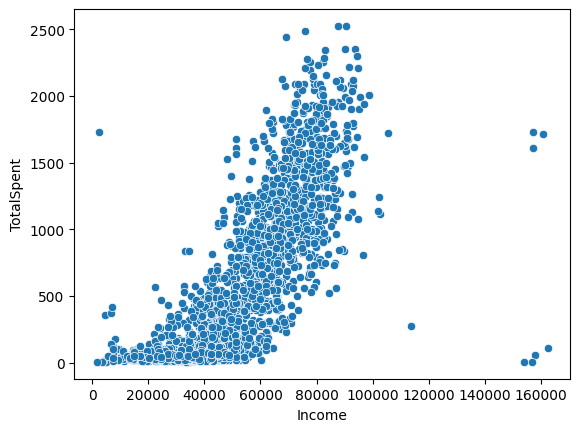

In [93]:
sns.scatterplot(data= campaign, x= "Income", y ="TotalSpent")

* It seems there is not linear Correlation between Income and Spending, so we will use Spearman Test instead of Person Correlation test

In [94]:
# H0: No correlation
# Ha: There is correlation

spearman_coeff, p_value = spearmanr(campaign["Income"] ,campaign["TotalSpent"])
print(spearman_coeff)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("There is correlation")
else:
    print("Fail to reject H0")
    print("There is no correlation")

0.8488353097986194
0.0
Reject H0
There is correlation


* There is a Strong Correlation between Spending and Income
* Also we will check if Higher Income group has Higher Spending

* Lets us check T-Test or Mann whitney Test

In [95]:
campaign.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Country', 'Children', 'Age', 'cmpaccepted',
       'Incomegroup', 'TotalSpent'],
      dtype='object')

In [97]:
campaign["Incomegroup"].value_counts()

Incomegroup
lowerincome    1132
upperincome    1107
Name: count, dtype: int64

In [98]:
LowerIncomegroup = campaign[campaign["Incomegroup"]=="lowerincome "]["TotalSpent"]
UpperIncomegroup = campaign[campaign["Incomegroup"]=="upperincome"]["TotalSpent"]

Before using 2 Sample/Independent T test, we will check if 2 Samples have equal variance

* For Equal Variances Check, we will use Levene Test with below Hypothesis condition
** H0: Variances are equal
** Ha: Variances are not equal




In [99]:
# Ho: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(LowerIncomegroup,UpperIncomegroup)
print(p_value)
if p_value < 0.05:
    print("Reject Ho")
    print("Variances are not equal")
else:
    print("Fail to reject Ho")
    print("Variances are equal")

nan
Fail to reject Ho
Variances are equal


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


### Do couples spend more or less money on wine than people living alone (set 'Married','Together':'In couple' and 'Divorced','Single','Absurd','Widow','YOLO':'Alone')

### Are people with lower income are more attracted towards campaign or simply put accept more campaigns. ( create two income brackets one below median , other above median income and create a column which tells if they have ever accepted any campaign)

## Univariate Analysis

In [ ]:
shopping.Administrative.describe()

count    12330.000000
mean         2.315166
std          3.321784
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: Administrative, dtype: float64

<Axes: xlabel='Administrative', ylabel='count'>

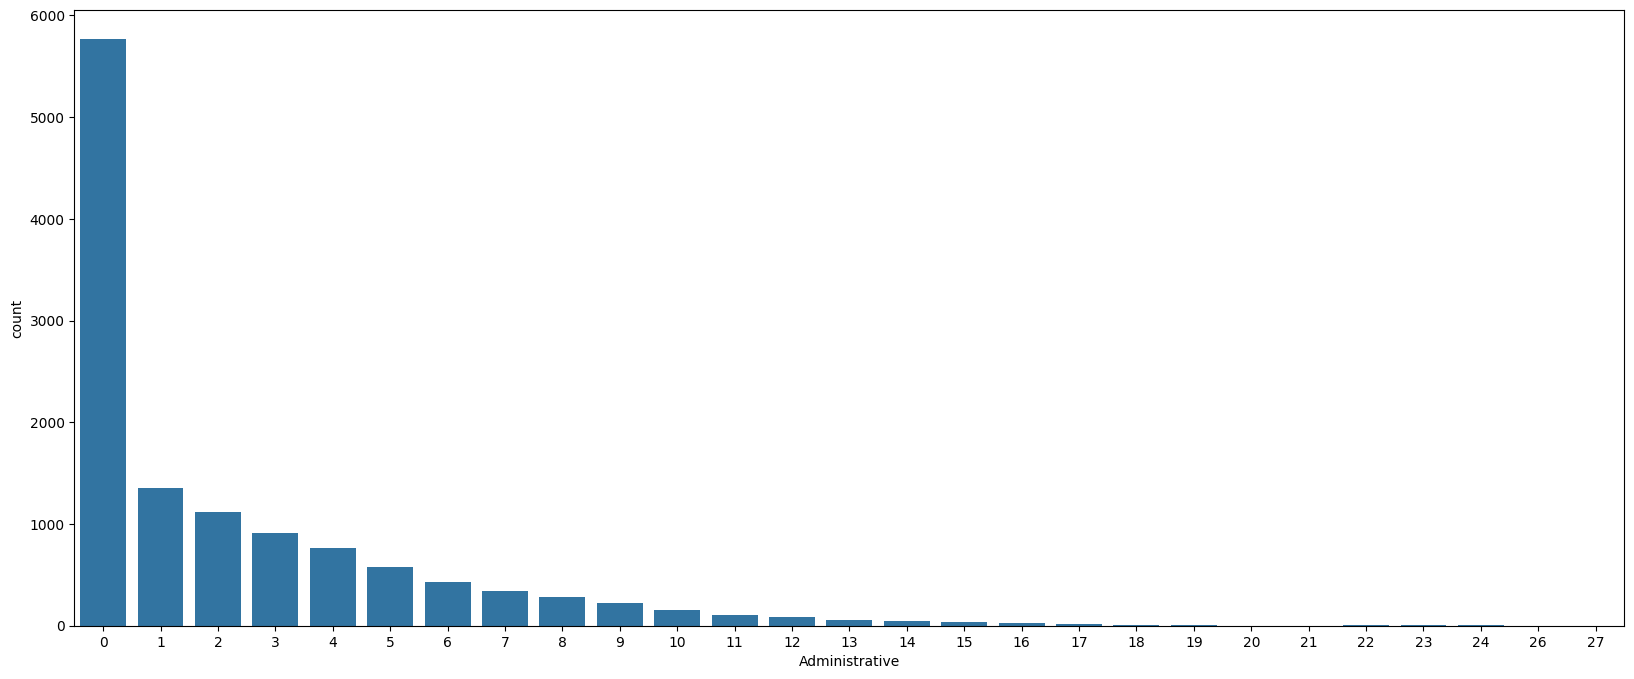

In [ ]:
plt.figure(figsize =(20,8))
sns.countplot(data=shopping, x = "Administrative")

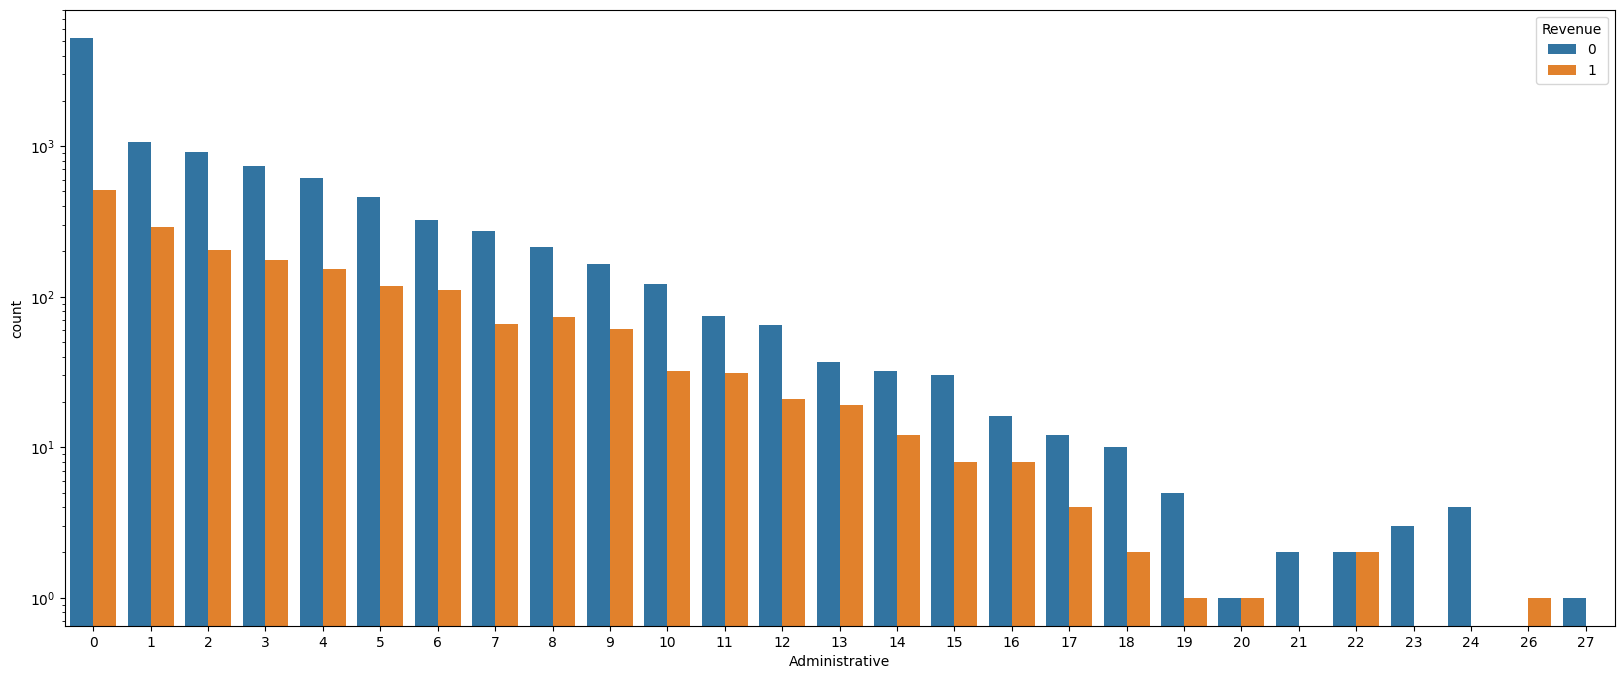

In [ ]:
plt.figure(figsize =(20,8))
sns.countplot(data=shopping, x = "Administrative", hue = "Revenue")
plt.yscale("log")

<Axes: ylabel='Administrative_Duration'>

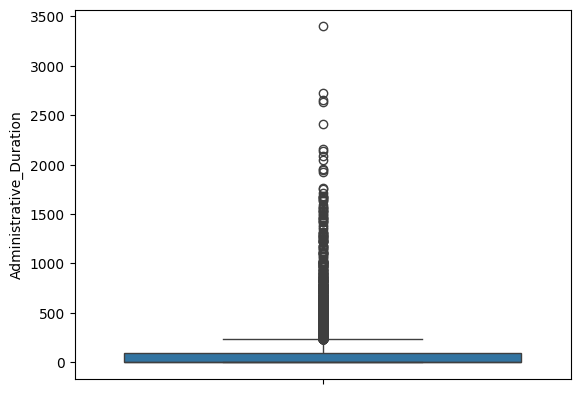

In [ ]:
sns.boxplot(shopping["Administrative_Duration"])

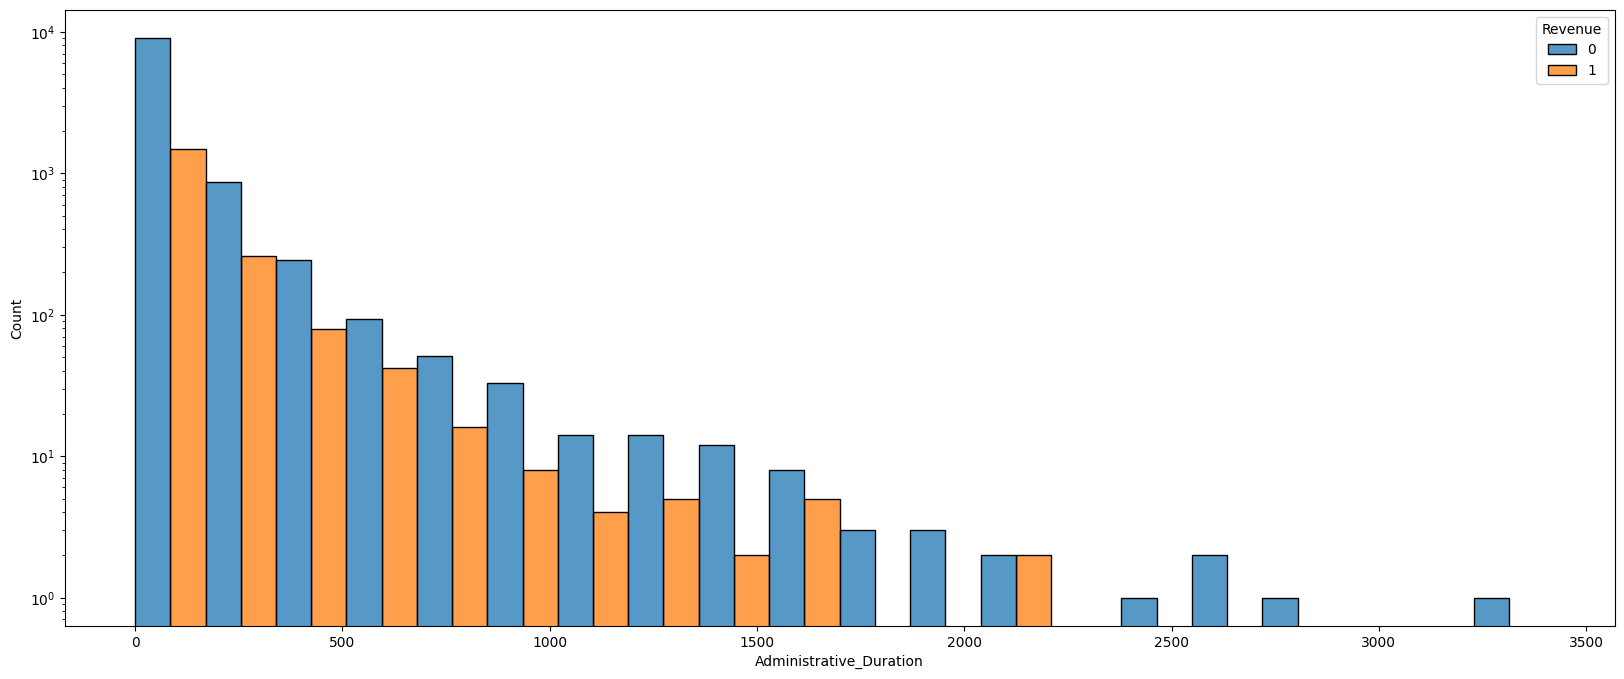

In [ ]:
plt.figure(figsize =(20,8))
sns.histplot(data=shopping, x = "Administrative_Duration", hue = "Revenue", bins =20, multiple = "dodge")
plt.yscale("log")

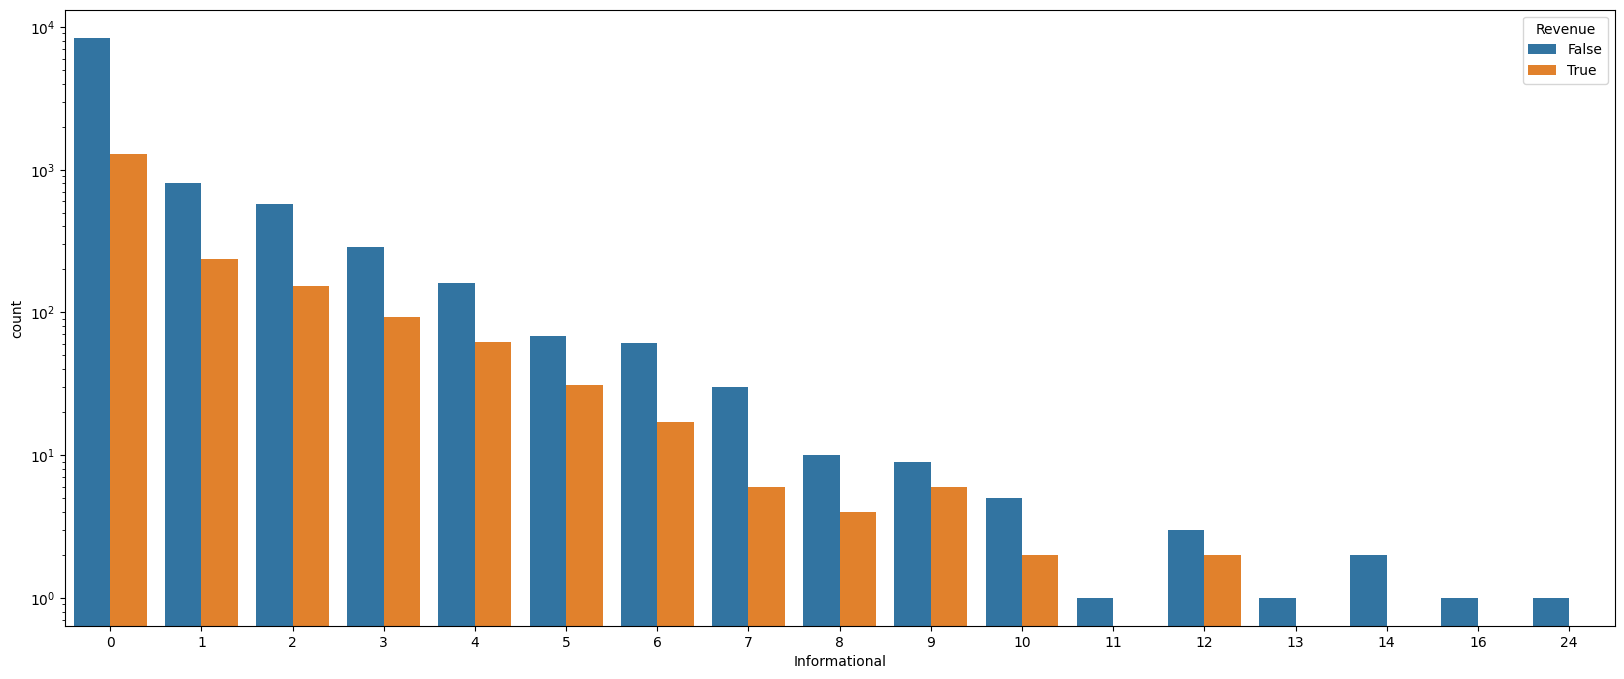

In [ ]:
plt.figure(figsize =(20,8))
sns.countplot(data=shopping, x = "Informational", hue = "Revenue")
plt.yscale("log")

<Axes: xlabel='Informational_Duration'>

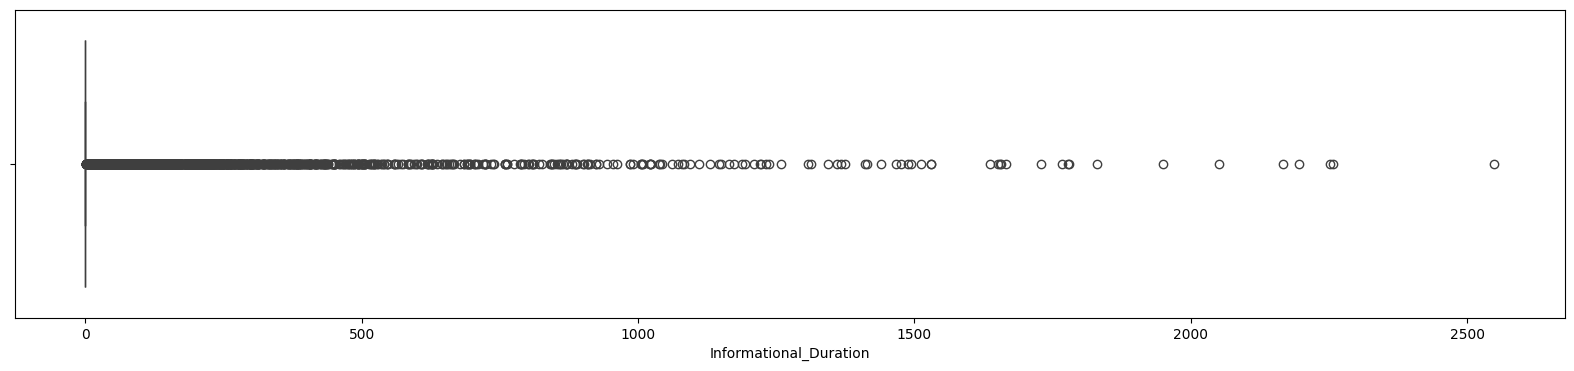

In [ ]:
plt.figure(figsize =(20,4))
sns.boxplot(x=shopping["Informational_Duration"])

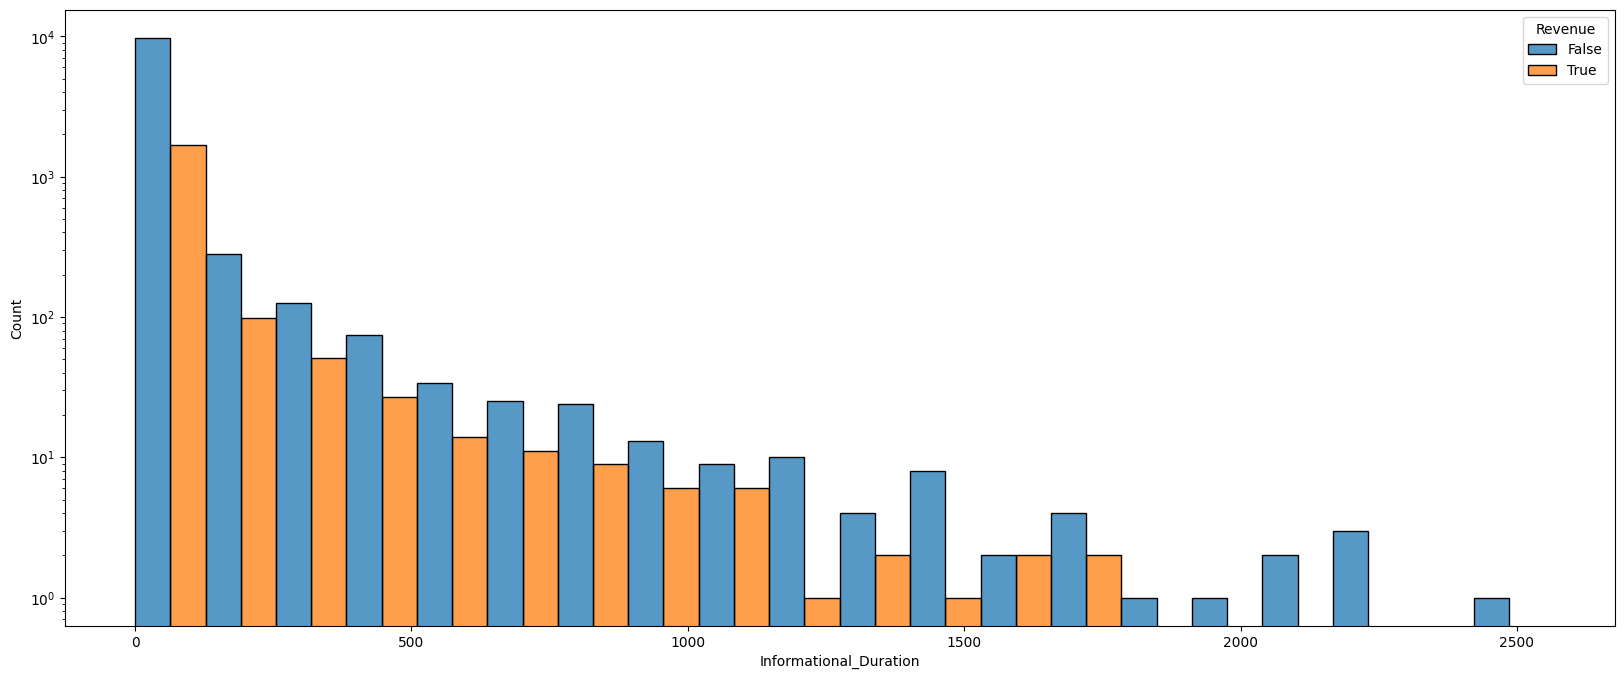

In [ ]:
plt.figure(figsize =(20,8))
sns.histplot(data=shopping, x = "Informational_Duration", hue = "Revenue", bins =20, multiple = "dodge",common_norm=True)
plt.yscale("log")

In [ ]:
shopping["ProductRelated"].describe()

count    12330.000000
mean        31.731468
std         44.475503
min          0.000000
25%          7.000000
50%         18.000000
75%         38.000000
max        705.000000
Name: ProductRelated, dtype: float64

<Axes: xlabel='ProductRelated'>

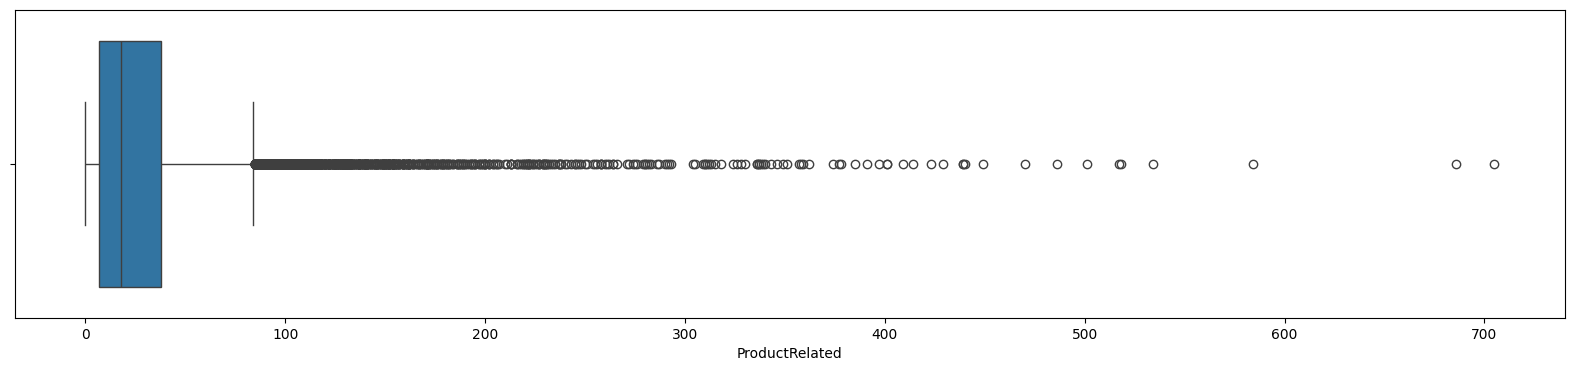

In [ ]:
plt.figure(figsize =(20,4))
sns.boxplot(x=shopping["ProductRelated"])

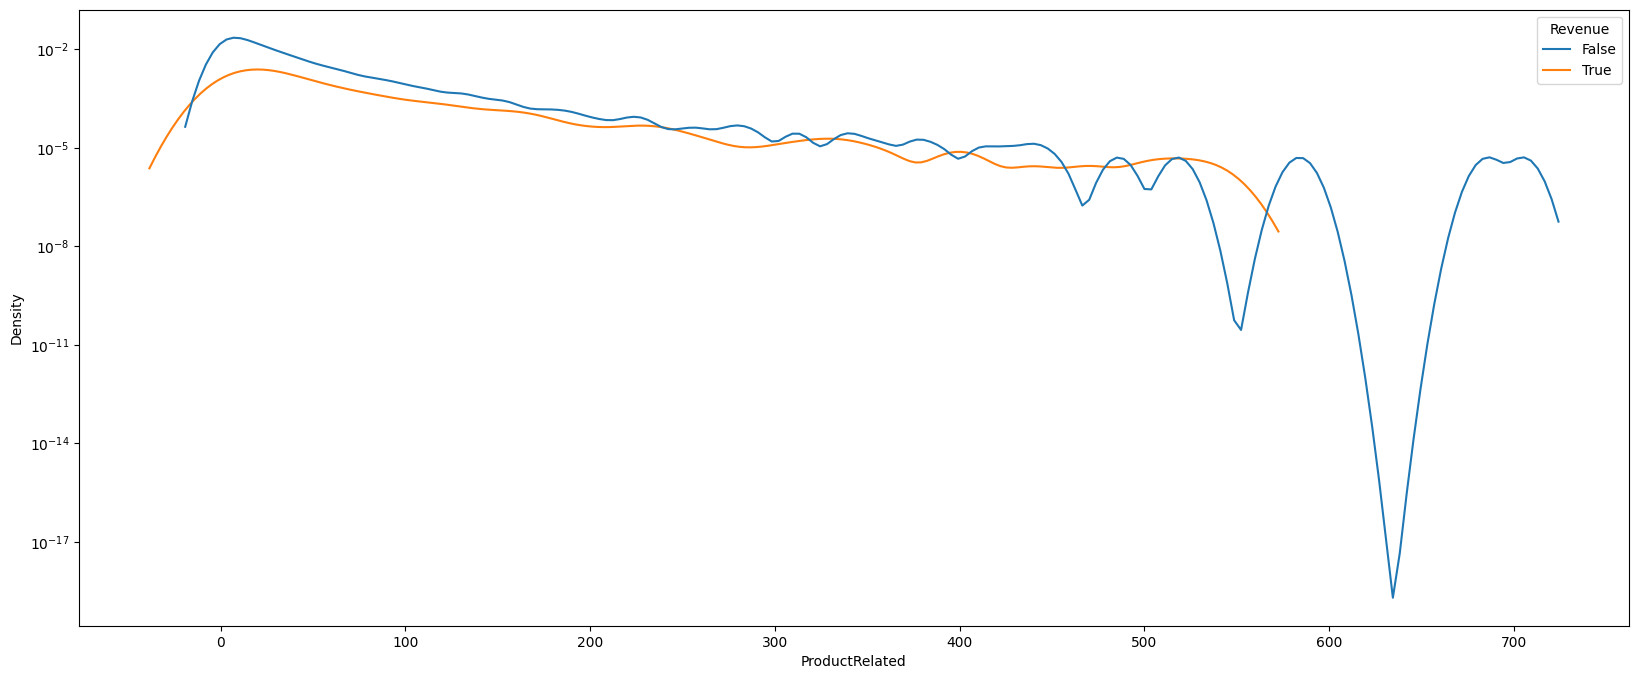

In [ ]:
plt.figure(figsize =(20,8))
sns.kdeplot(data=shopping, x = "ProductRelated", hue = "Revenue")
plt.yscale("log")

<Axes: xlabel='ProductRelated_Duration'>

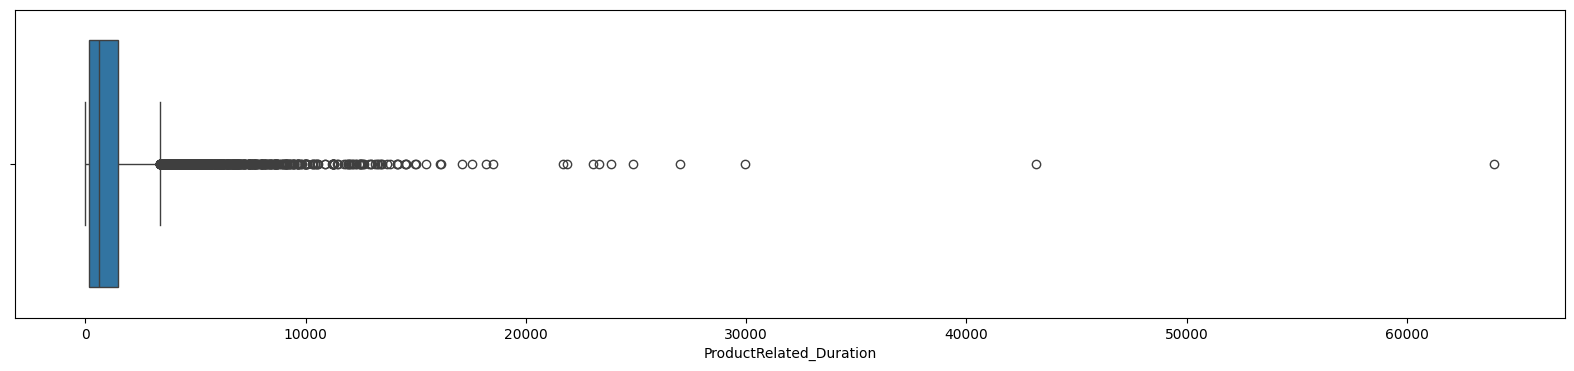

In [ ]:
plt.figure(figsize =(20,4))
sns.boxplot(x= shopping["ProductRelated_Duration"])

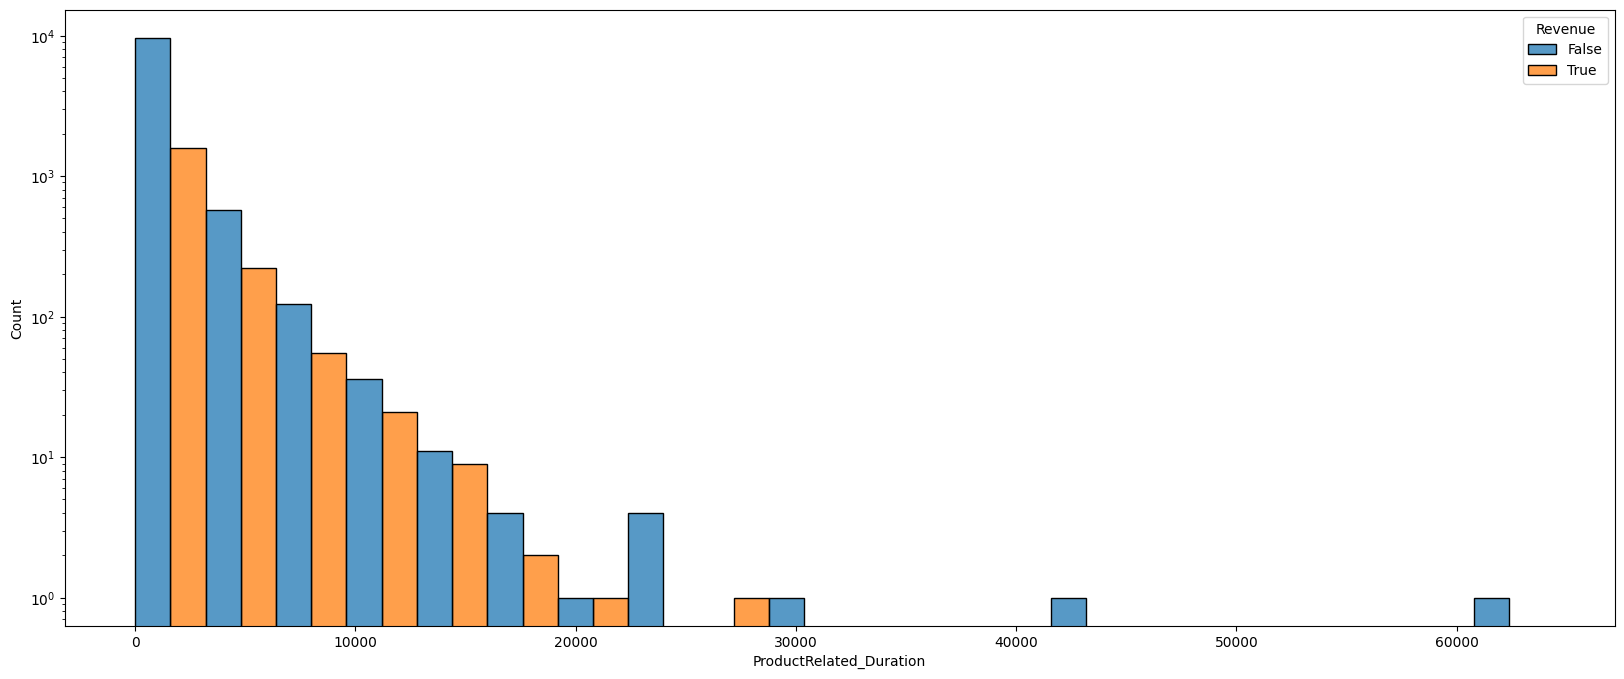

In [ ]:
plt.figure(figsize =(20,8))
sns.histplot(data=shopping, x = "ProductRelated_Duration", hue = "Revenue", bins =20, multiple = "dodge")
plt.yscale("log")

In [ ]:
shopping["BounceRates"].describe()

count    12330.000000
mean         0.022191
std          0.048488
min          0.000000
25%          0.000000
50%          0.003112
75%          0.016813
max          0.200000
Name: BounceRates, dtype: float64

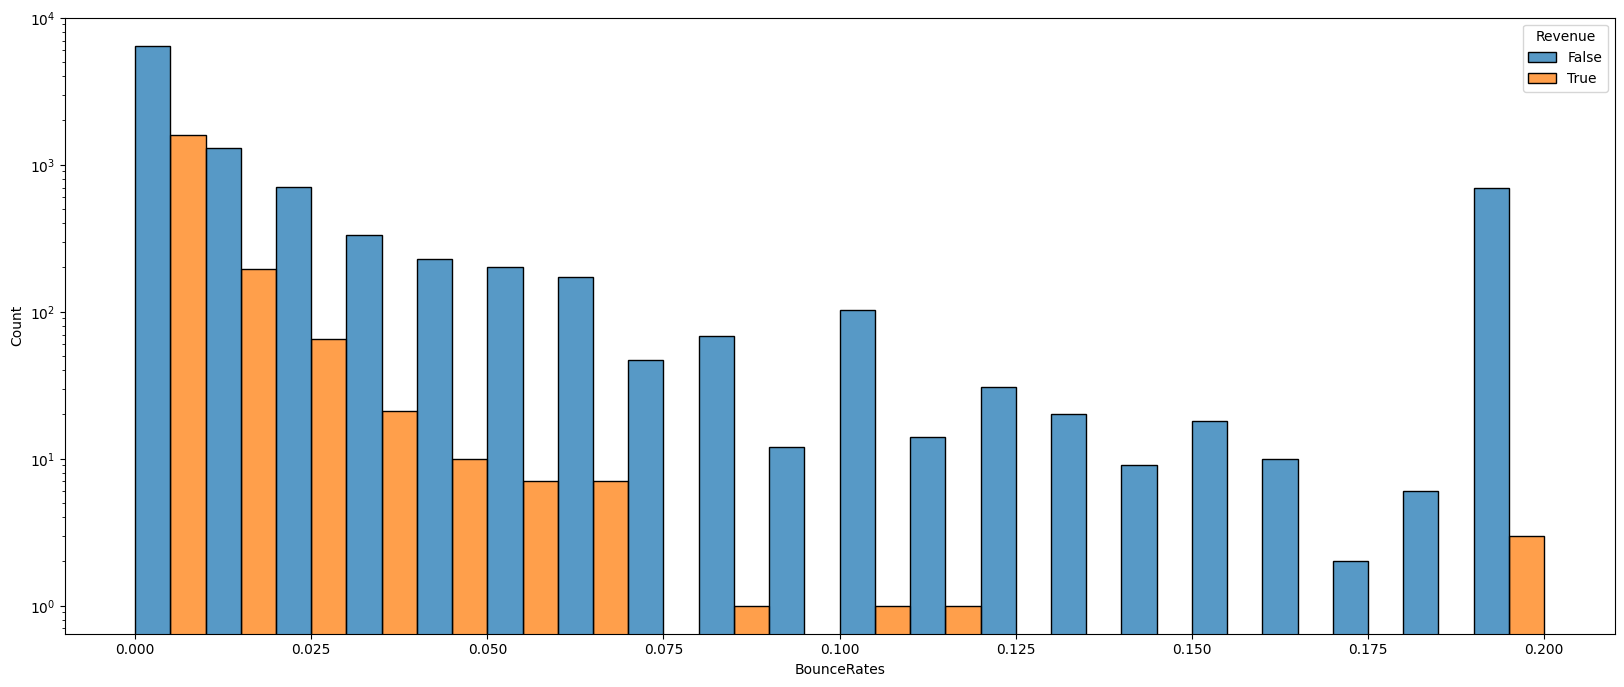

In [ ]:
plt.figure(figsize =(20,8))
sns.histplot(data=shopping, x = "BounceRates", hue = "Revenue", bins = 20, multiple = "dodge")
plt.yscale("log")

<Axes: xlabel='BounceRates', ylabel='Density'>

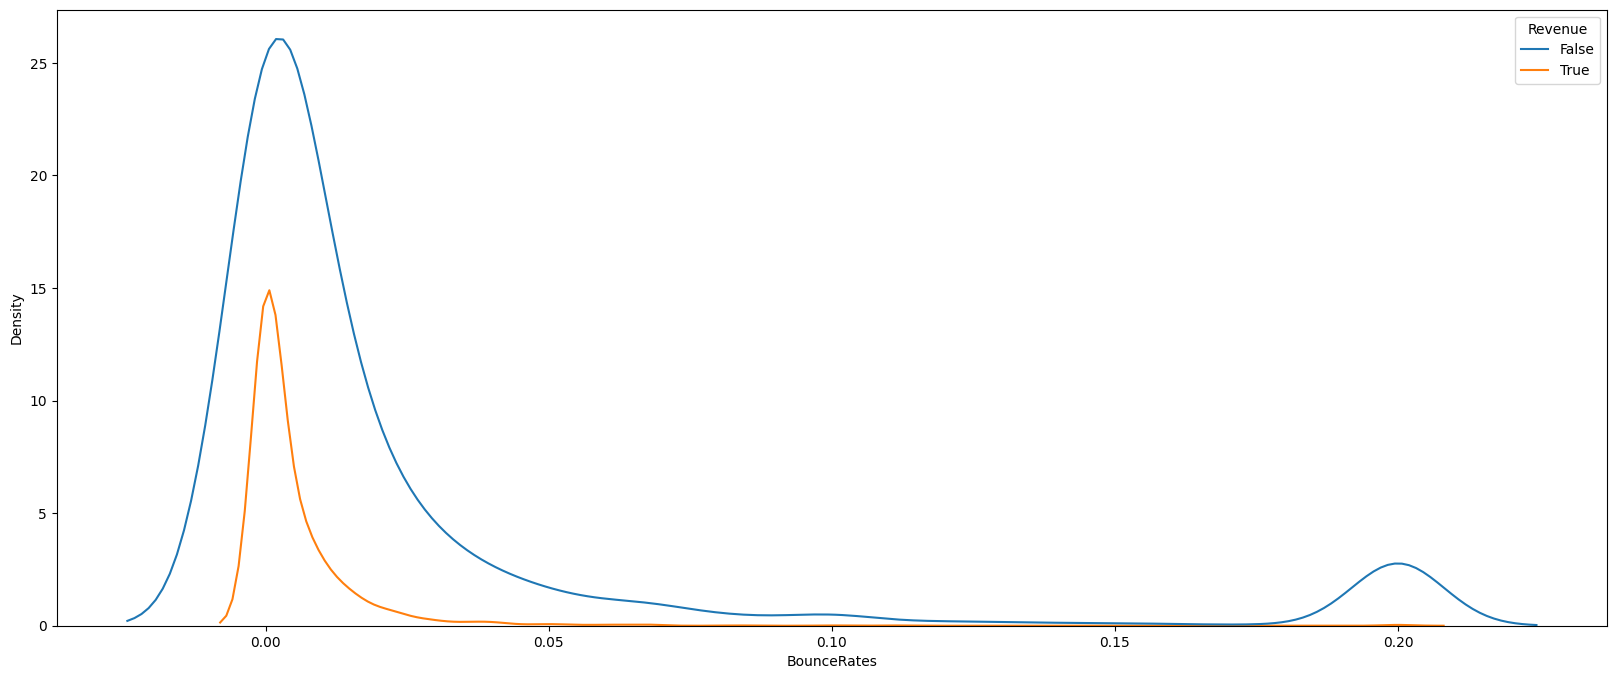

In [ ]:
plt.figure(figsize =(20,8))
sns.kdeplot(data=shopping, x = "BounceRates", hue = "Revenue")

In [ ]:
shopping["ExitRates"].describe()

count    12330.000000
mean         0.043073
std          0.048597
min          0.000000
25%          0.014286
50%          0.025156
75%          0.050000
max          0.200000
Name: ExitRates, dtype: float64

<Axes: xlabel='ExitRates'>

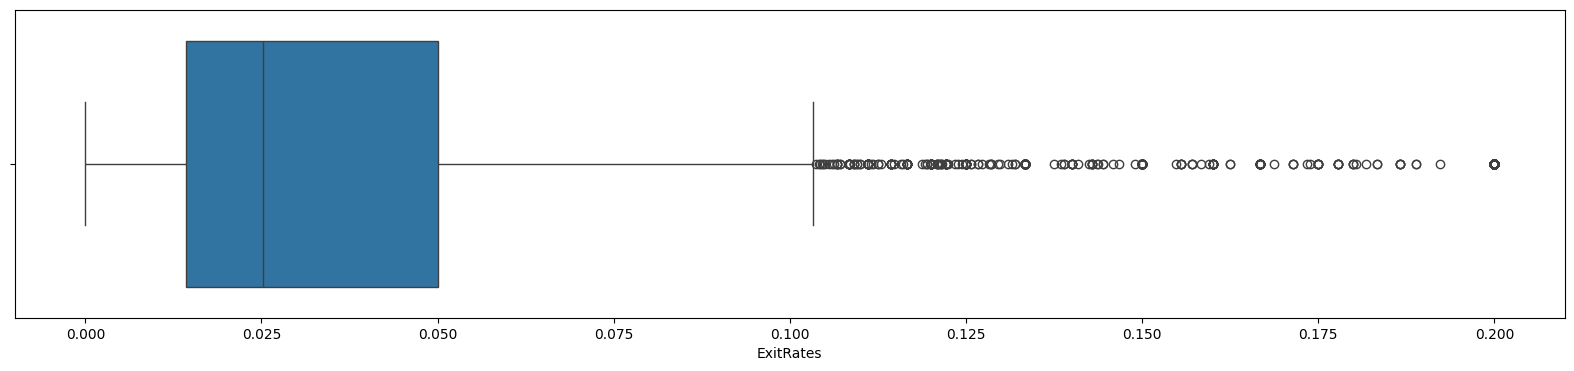

In [ ]:
plt.figure(figsize =(20,4))
sns.boxplot(x= shopping["ExitRates"])

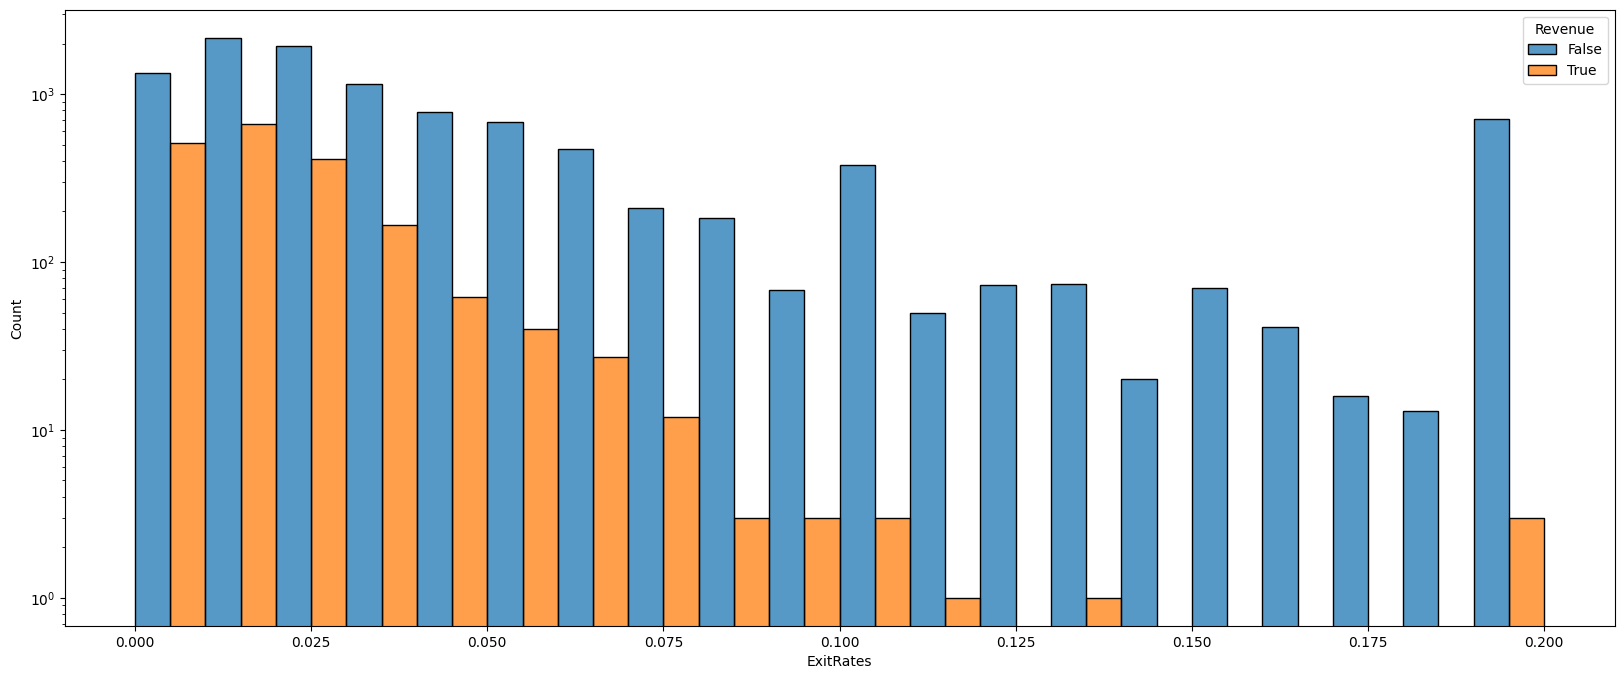

In [ ]:
plt.figure(figsize =(20,8))
sns.histplot(data=shopping, x = "ExitRates", hue = "Revenue", bins = 20, multiple = "dodge")
plt.yscale("log")

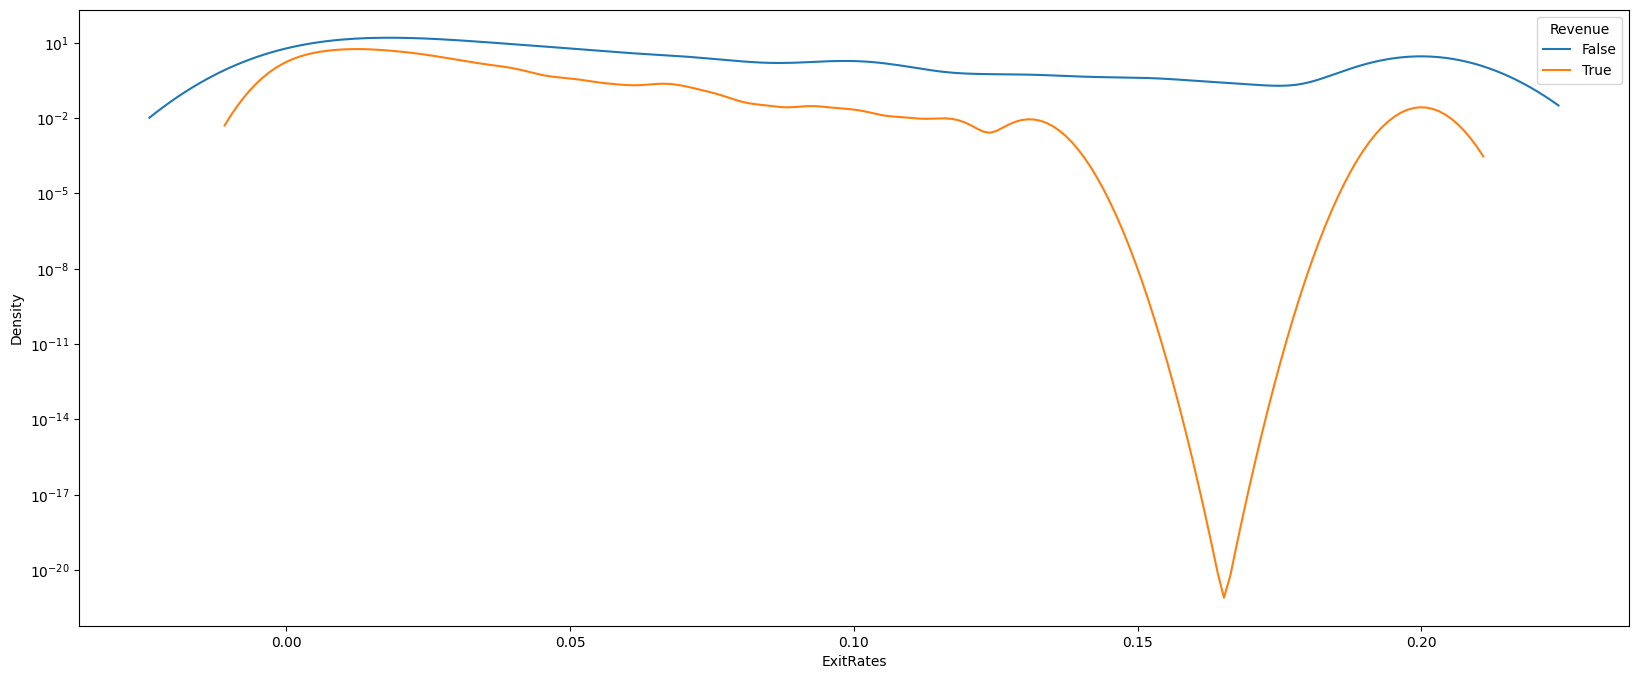

In [ ]:
plt.figure(figsize =(20,8))
sns.kdeplot(data=shopping, x = "ExitRates", hue = "Revenue")
plt.yscale("log")

In [ ]:
shopping["PageValues"].describe()

count    12330.000000
mean         5.889258
std         18.568437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

<Axes: xlabel='PageValues'>

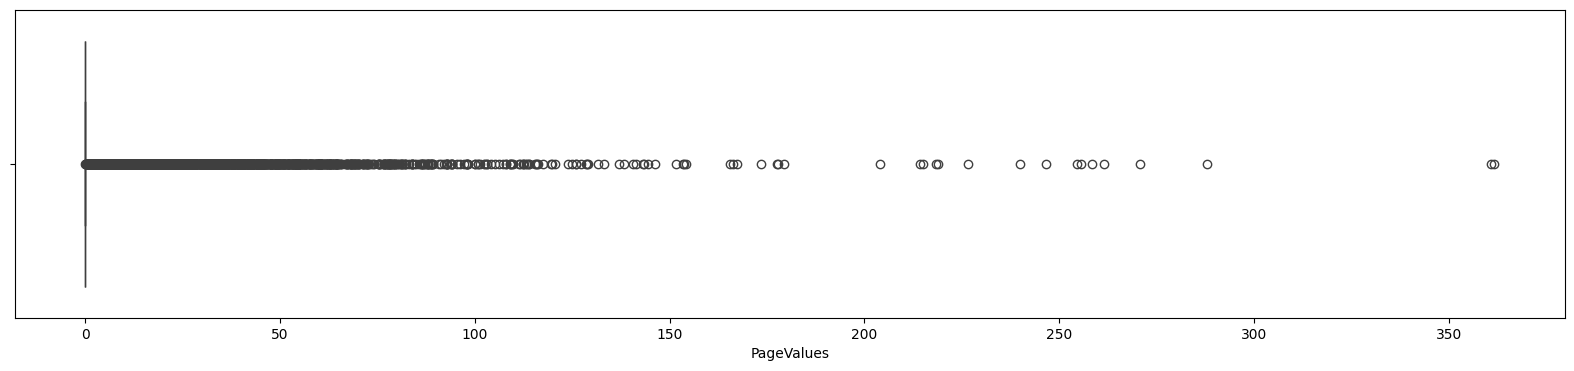

In [ ]:
plt.figure(figsize =(20,4))
sns.boxplot(x= shopping["PageValues"])

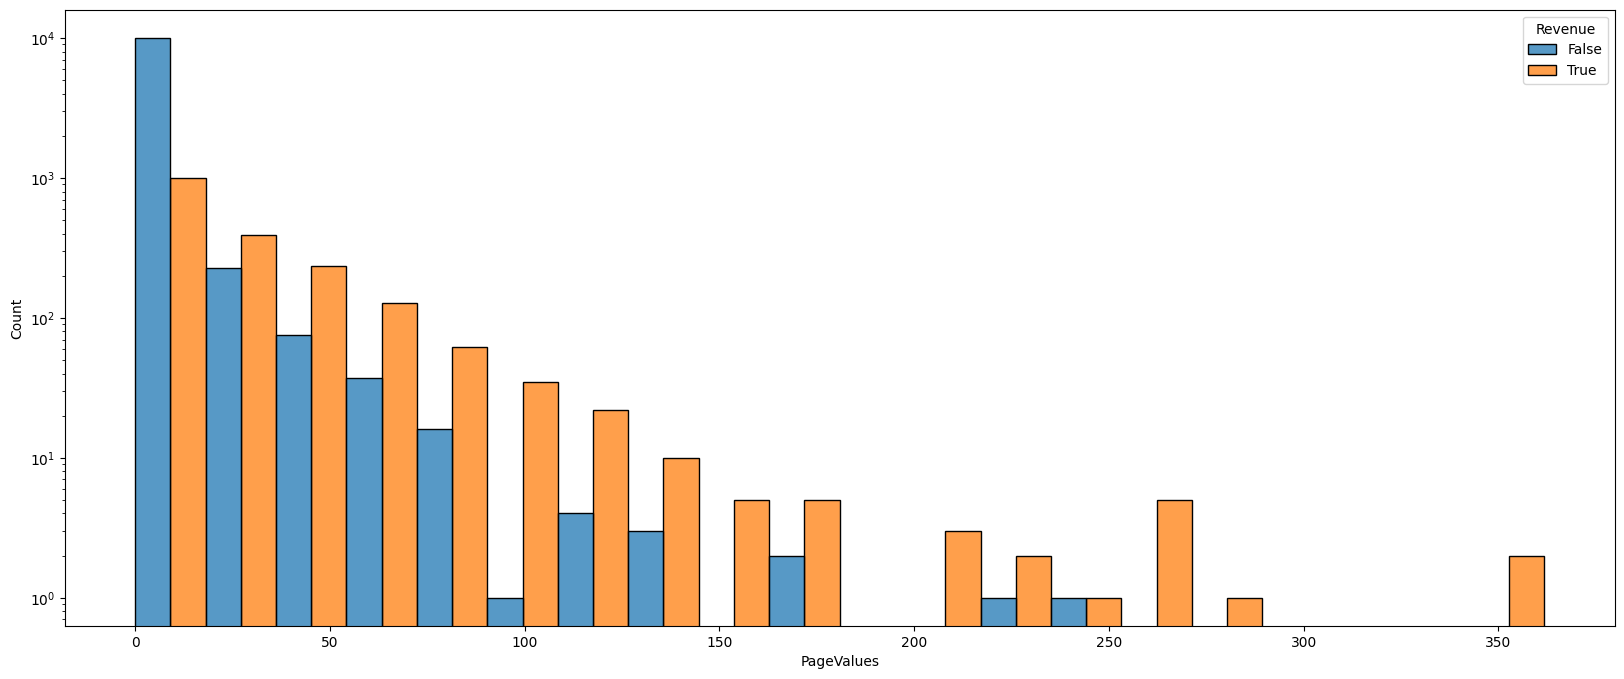

In [ ]:
plt.figure(figsize =(20,8))
sns.histplot(data=shopping, x = "PageValues", hue = "Revenue", bins = 20, multiple = "dodge")
plt.yscale("log")

In [ ]:
shopping["SpecialDay"].describe()

count    12330.000000
mean         0.061427
std          0.198917
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SpecialDay, dtype: float64

In [ ]:
shopping["SpecialDay"].value_counts()

SpecialDay
0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: count, dtype: int64

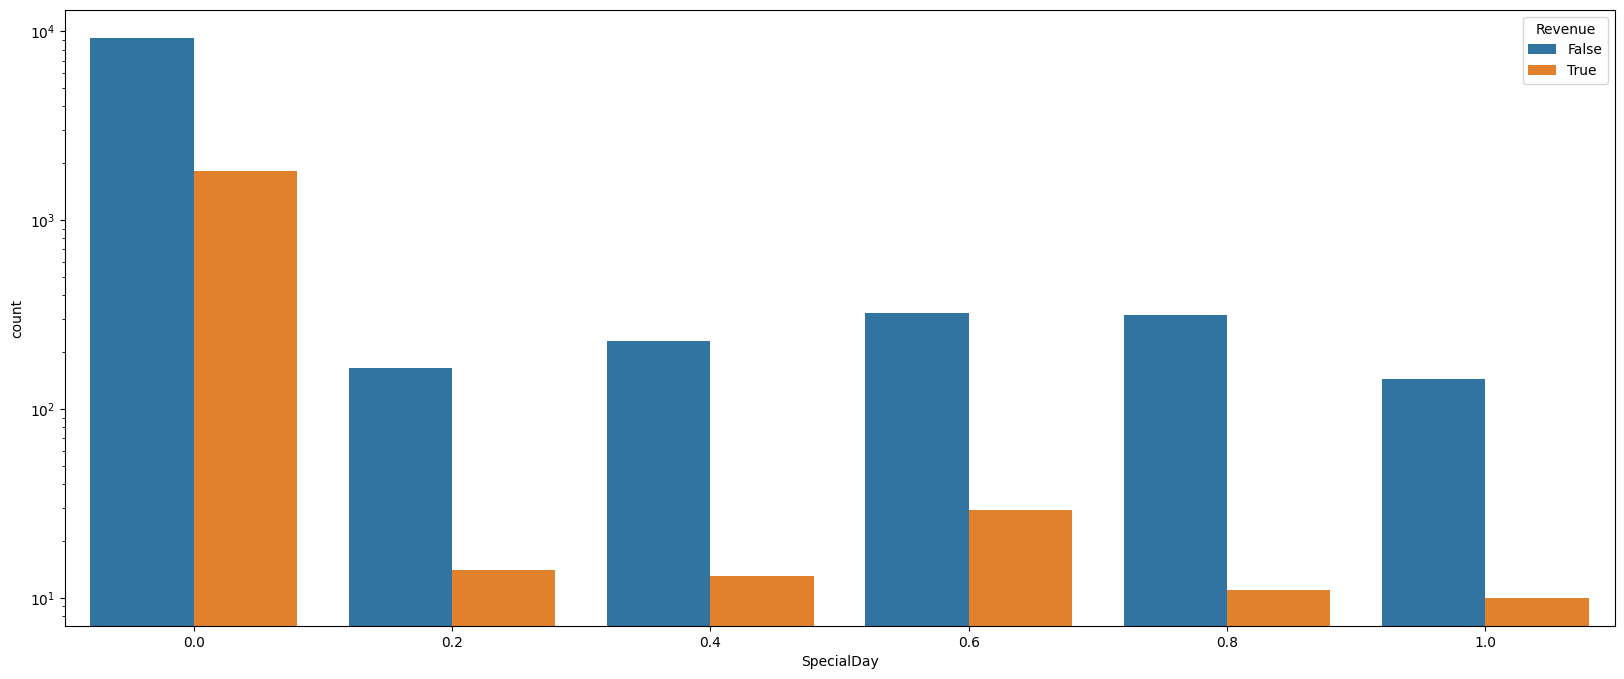

In [ ]:
plt.figure(figsize =(20,8))
sns.countplot(data =shopping, x ="SpecialDay", hue="Revenue")
plt.yscale("log")

<Axes: xlabel='Month', ylabel='count'>

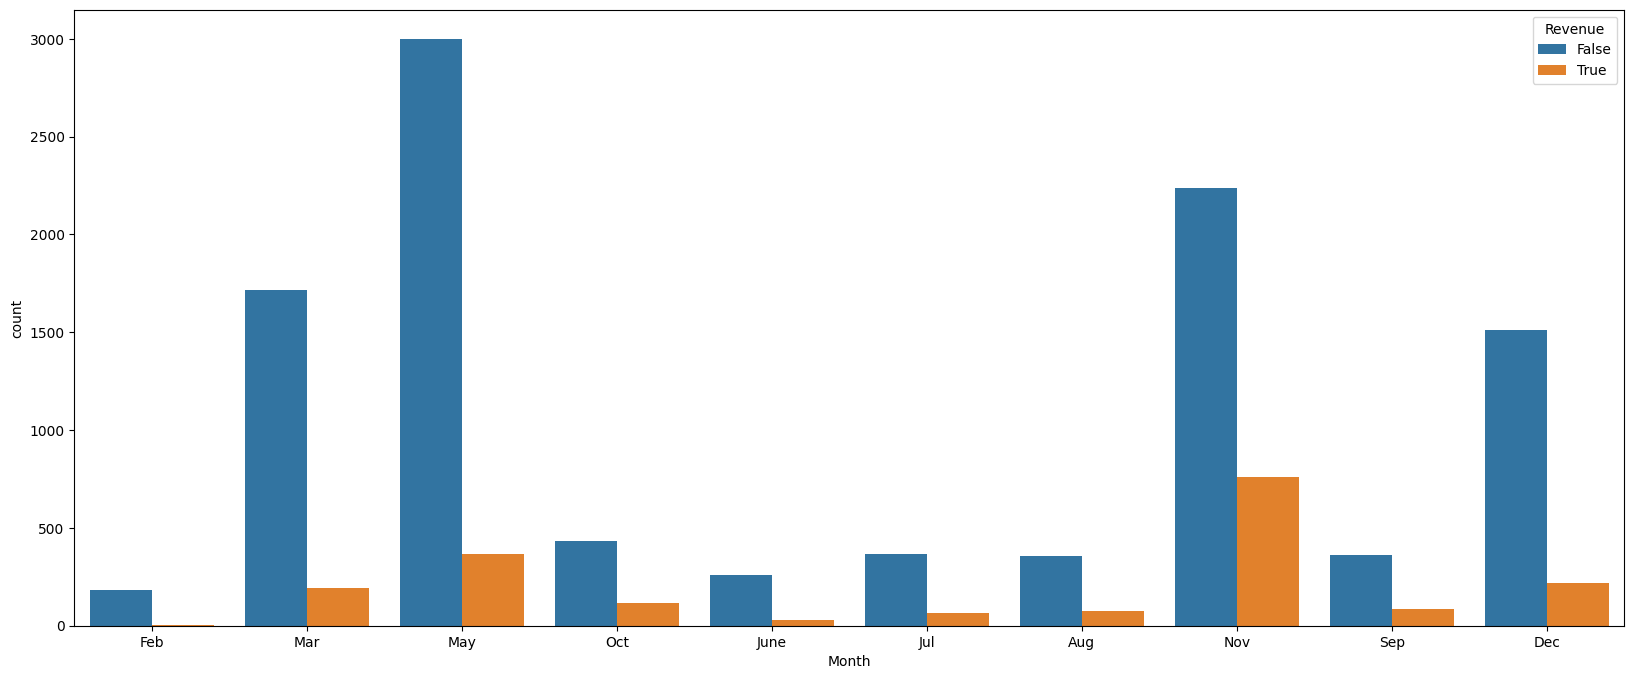

In [ ]:
plt.figure(figsize =(20,8))
sns.countplot(data=shopping, x = "Month", hue = "Revenue")

<Axes: xlabel='Revenue', ylabel='Month'>

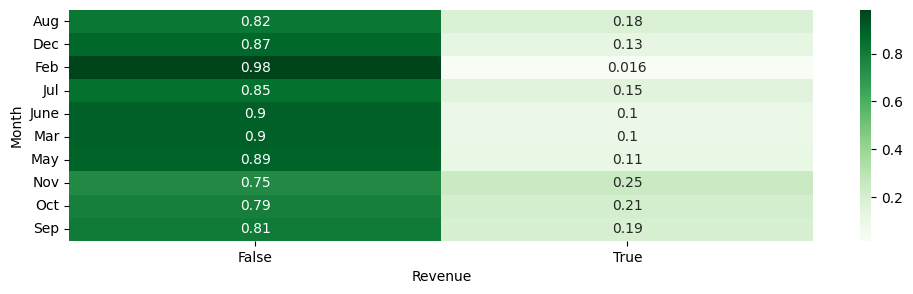

In [ ]:
plt.figure(figsize = (12,3))
sns.heatmap(data=pd.crosstab(shopping["Month"], shopping["Revenue"], normalize = "index"),annot=True,cmap = "Greens")

<Axes: xlabel='OperatingSystems', ylabel='count'>

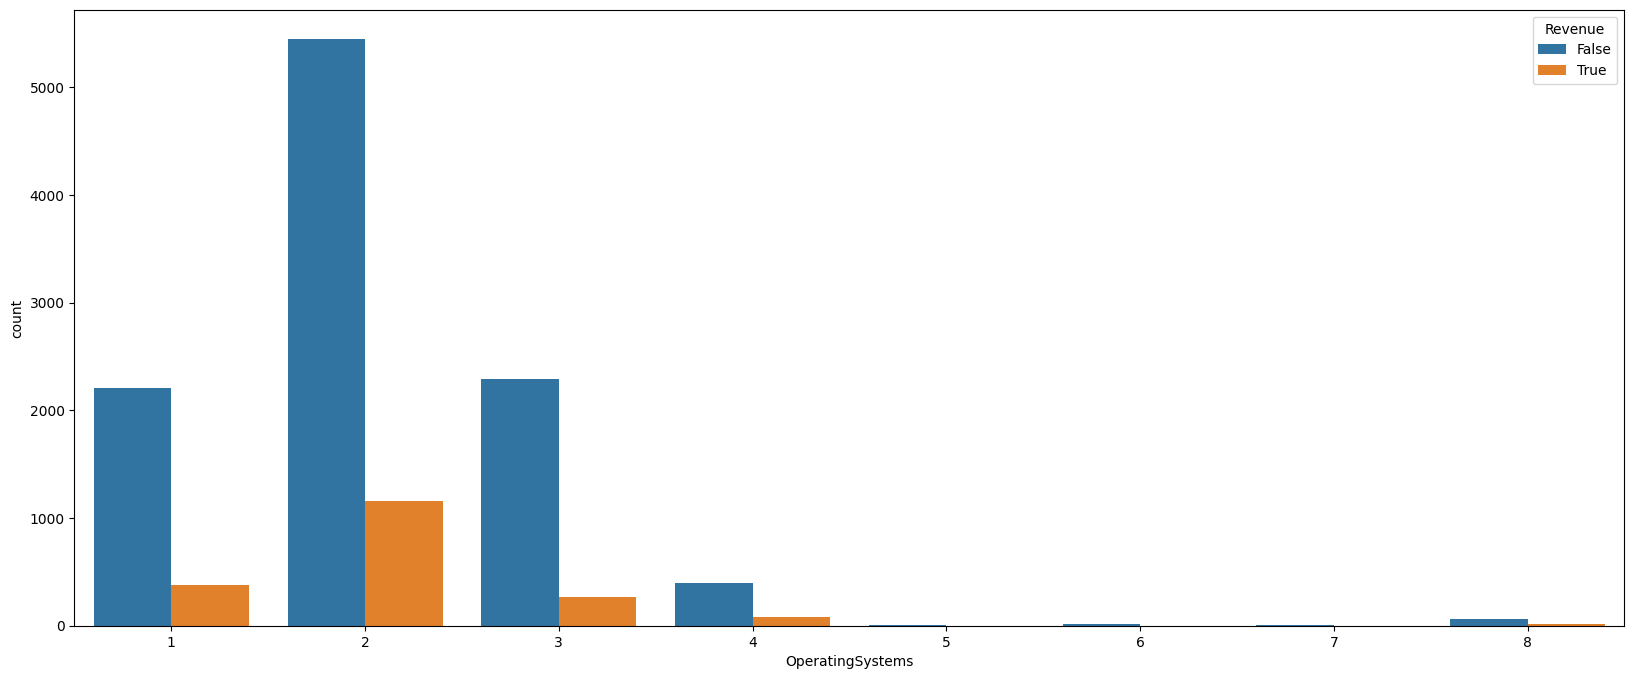

In [ ]:
plt.figure(figsize =(20,8))
sns.countplot(data=shopping, x = "OperatingSystems", hue = "Revenue")

<Axes: xlabel='Browser', ylabel='count'>

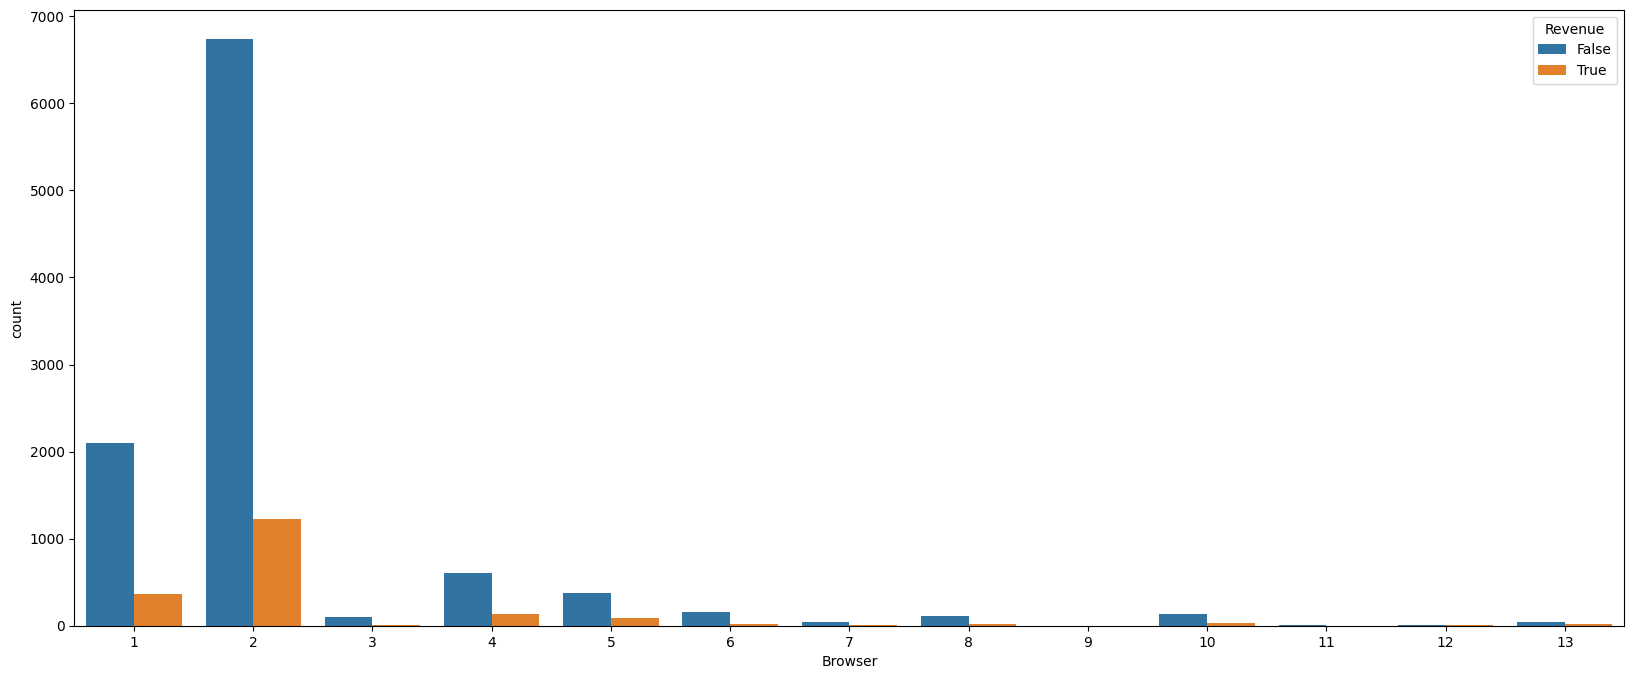

In [ ]:
plt.figure(figsize =(20,8))
sns.countplot(data=shopping, x = "Browser", hue = "Revenue")

<Axes: xlabel='Region', ylabel='count'>

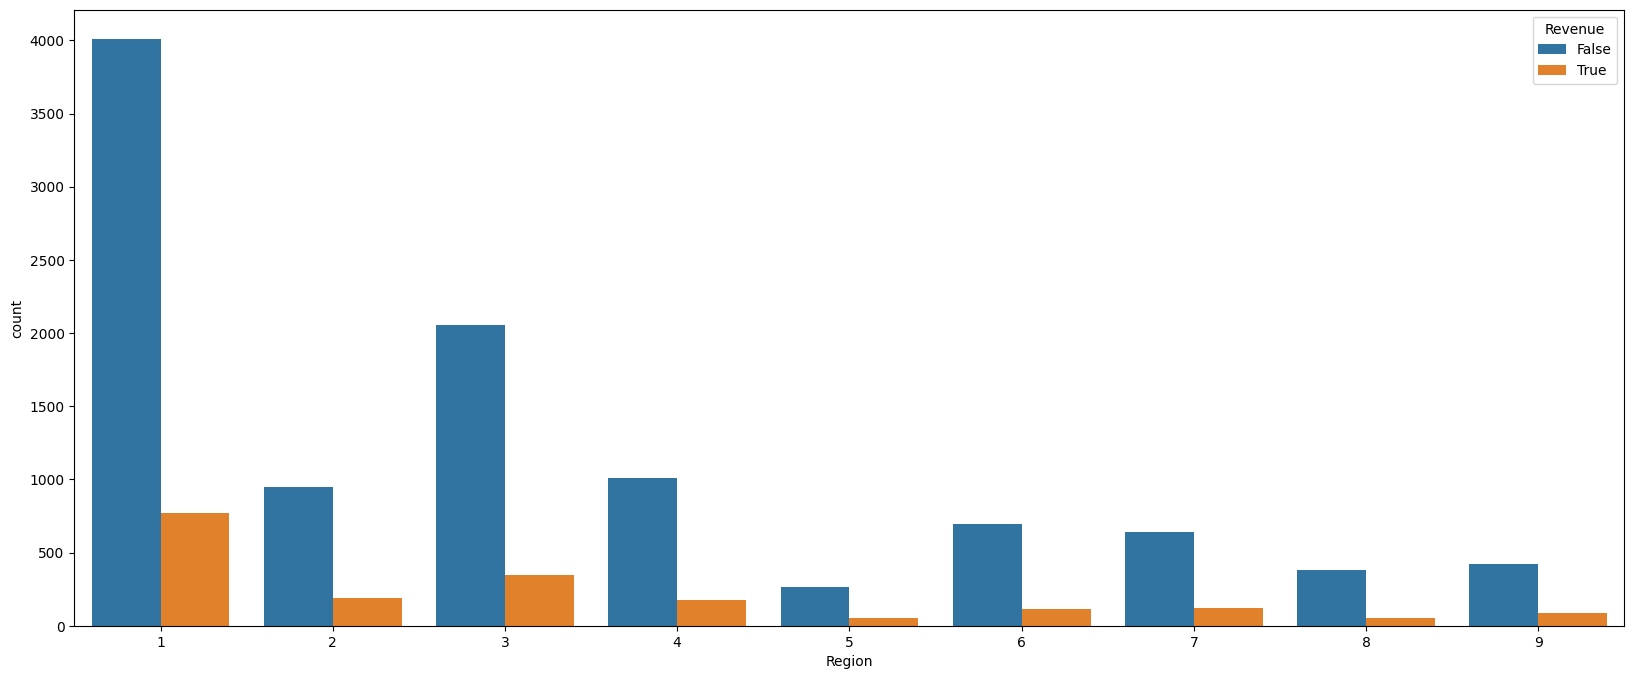

In [ ]:
plt.figure(figsize =(20,8))
sns.countplot(data=shopping, x = "Region", hue = "Revenue")

<Axes: xlabel='TrafficType', ylabel='count'>

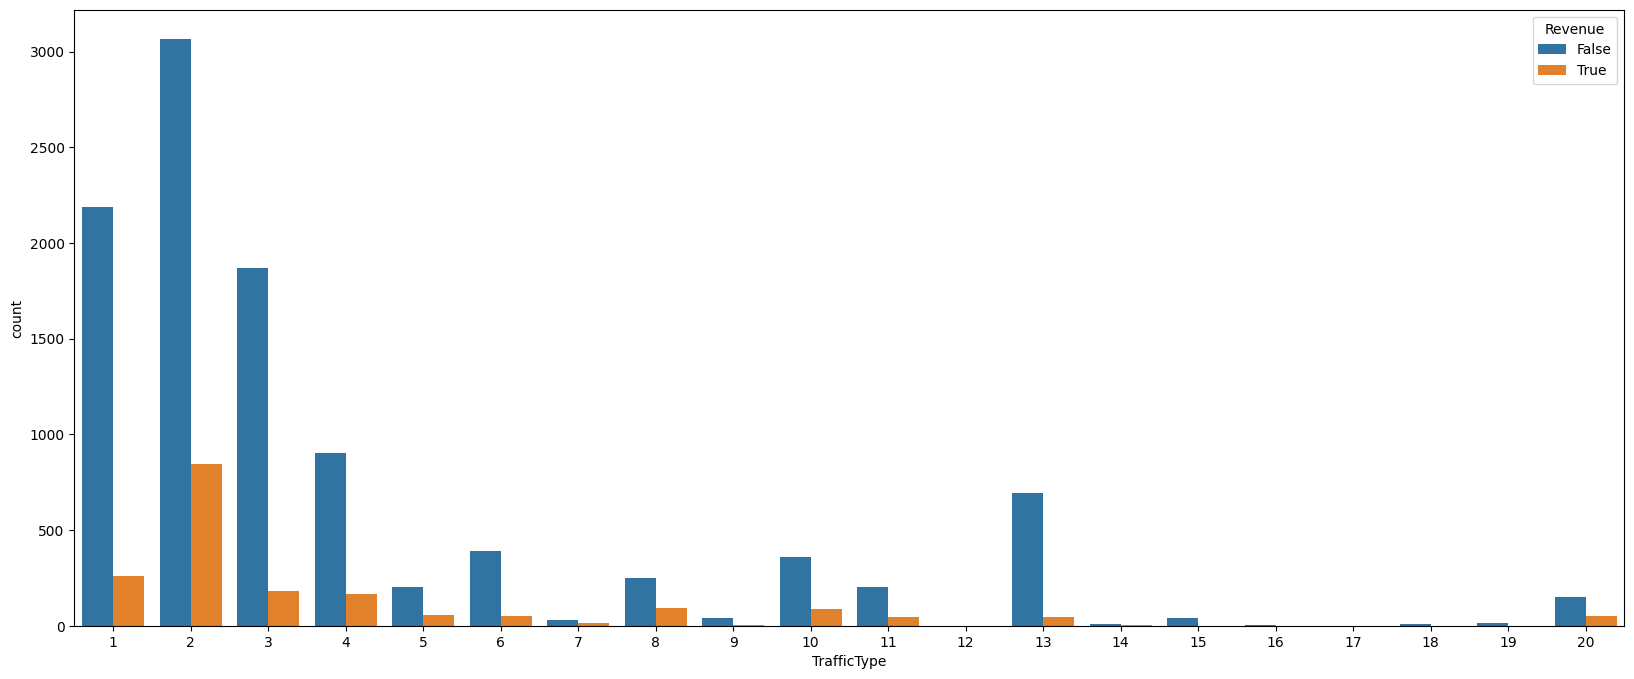

In [ ]:
plt.figure(figsize =(20,8))
sns.countplot(data=shopping, x = "TrafficType", hue = "Revenue")

<Axes: xlabel='VisitorType', ylabel='count'>

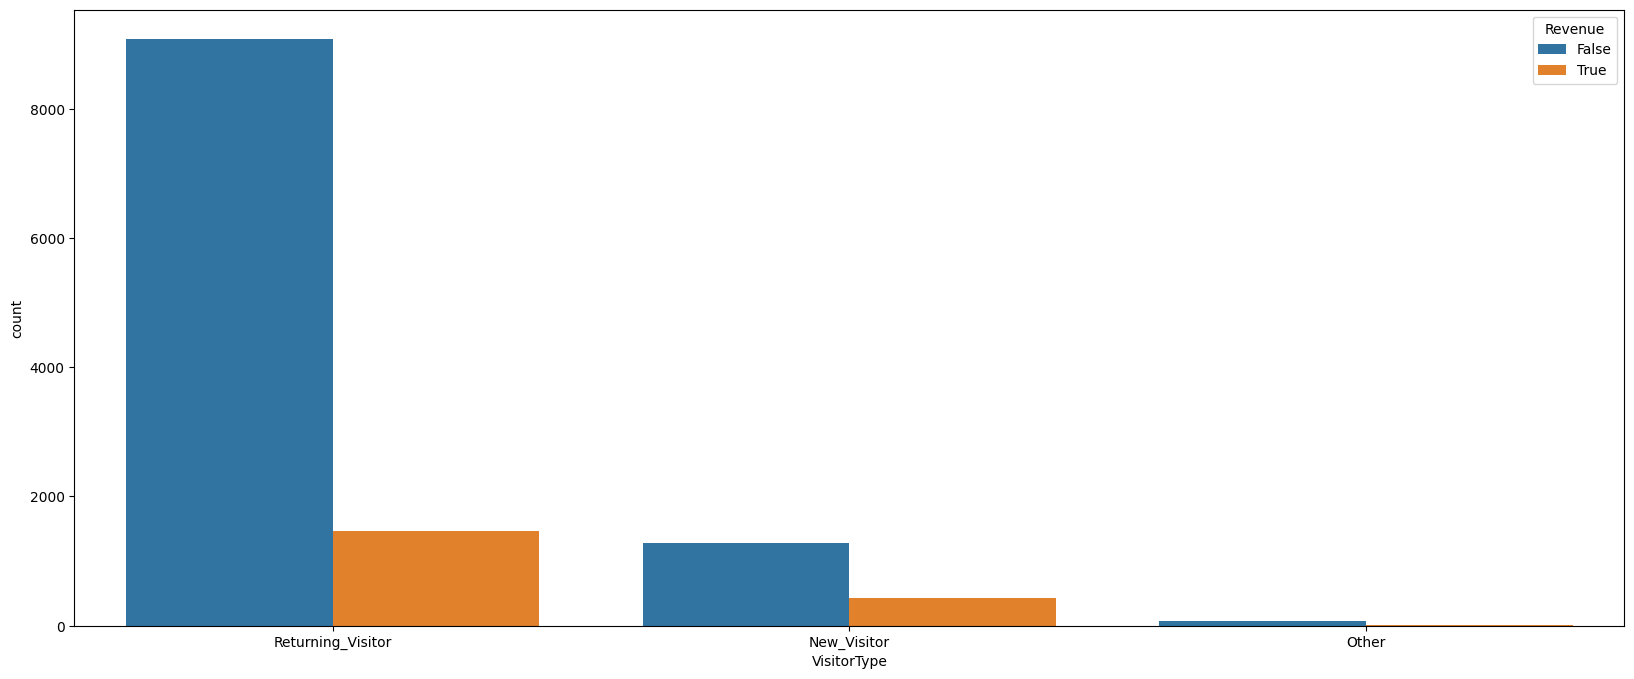

In [ ]:
plt.figure(figsize =(20,8))
sns.countplot(data=shopping, x = "VisitorType", hue = "Revenue")

<Axes: xlabel='Revenue', ylabel='VisitorType'>

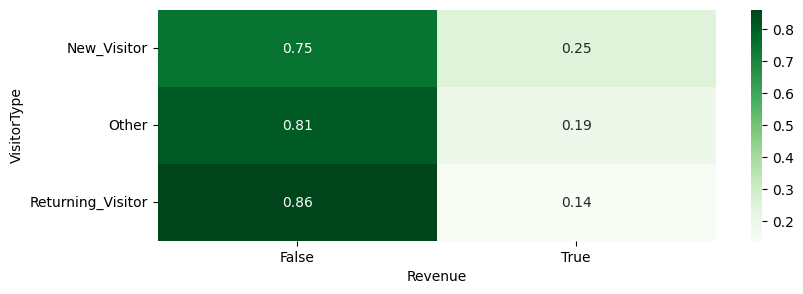

In [ ]:
plt.figure(figsize = (9,3))
sns.heatmap(data=pd.crosstab(shopping["VisitorType"], shopping["Revenue"], normalize = "index"),annot=True,cmap = "Greens")

In [ ]:
shopping.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

<Axes: xlabel='Weekend', ylabel='count'>

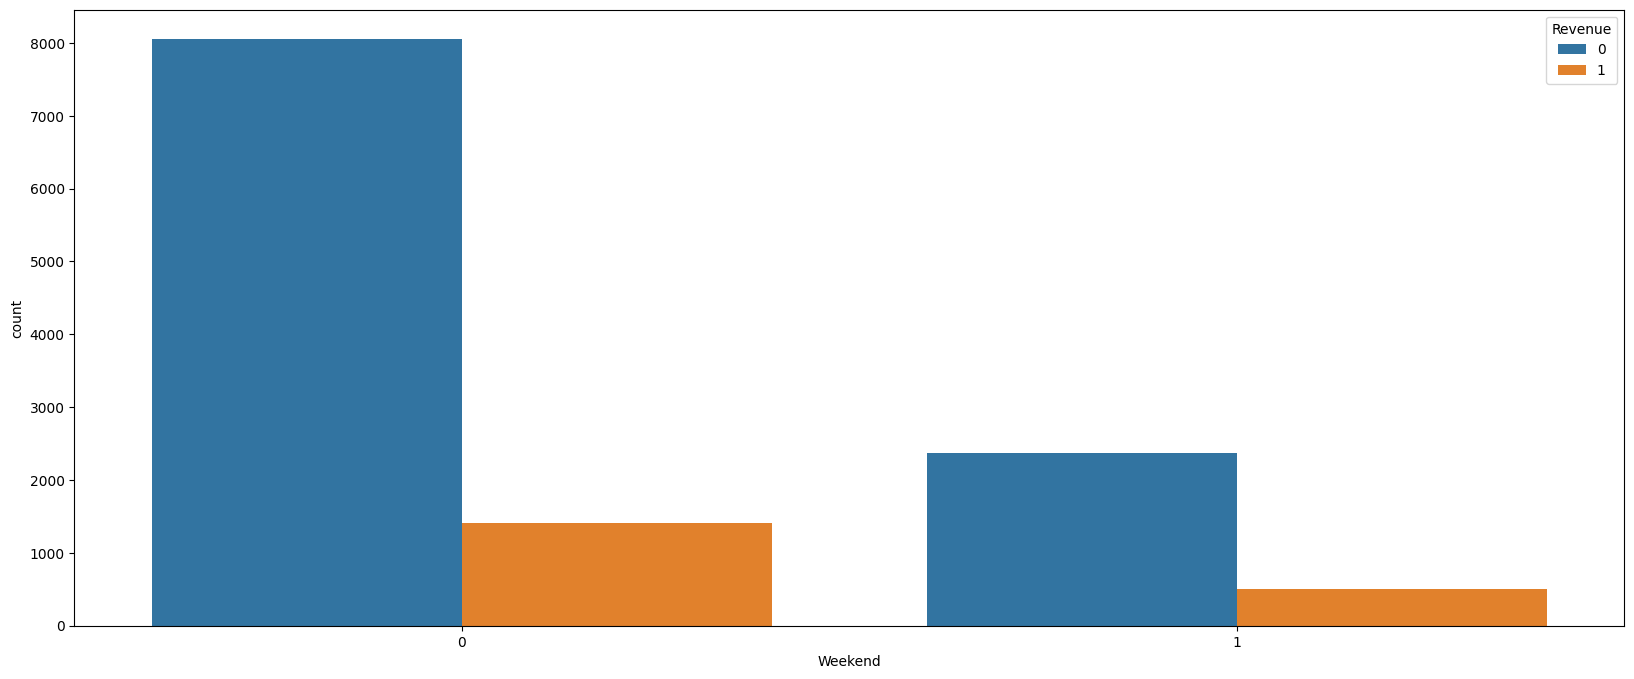

In [ ]:
plt.figure(figsize =(20,8))
sns.countplot(data=shopping, x = "Weekend", hue = "Revenue")

<Axes: xlabel='Revenue', ylabel='Weekend'>

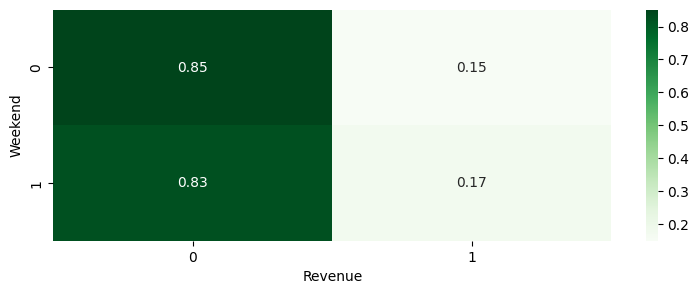

In [ ]:
plt.figure(figsize = (9,3))
sns.heatmap(data=pd.crosstab(shopping["Weekend"], shopping["Revenue"], normalize = "index"),annot=True,cmap = "Greens")

In [ ]:
shopping["Revenue"].value_counts(normalize = True)

Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64

In [ ]:
shopping["Revenue"].value_counts().reset_index()

,Revenue,count
0,False,10422
1,True,1908


In [ ]:
10422/1908

5.462264150943396

* High Imbalance in Class Data
* Will have to Use Data Balancing techniques like Class Weight or SMOTE to be used for Classification Modelling

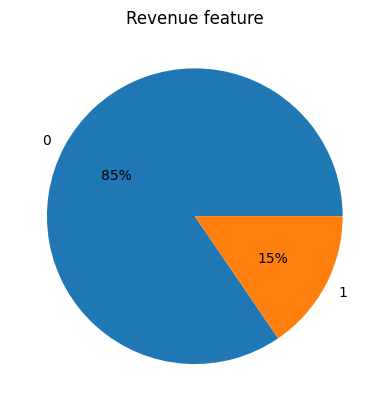

In [ ]:
plt.pie(x = shopping["Revenue"].value_counts().reset_index()["count"],
        labels = shopping["Revenue"].value_counts().reset_index()["Revenue"],
        autopct='%.0f%%')
plt.title("Revenue feature")
plt.show()

In [ ]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           